# Análisis de Datos de Equipos de Béisbol

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de estilo para las gráficas
# plt.style.use('seaborn') # deprecated
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


## Carga de Datos

In [3]:

# Cargar los datos procesados
df = pd.read_csv("../data/processed/team_stats.csv")


## 1. Análisis de la Hipótesis Principal: BB% vs Producción de Carreras

Correlación entre BB% y R/G: 0.455
P-value: 0.000


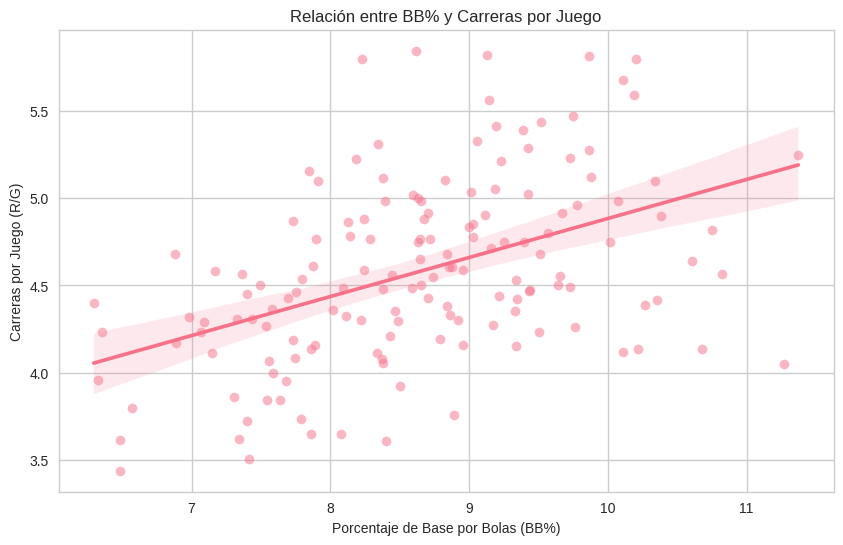

In [4]:

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='BB%', y='R/G', scatter_kws={'alpha':0.5})
plt.title('Relación entre BB% y Carreras por Juego')
plt.xlabel('Porcentaje de Base por Bolas (BB%)')
plt.ylabel('Carreras por Juego (R/G)')

# Calcular correlación y p-value
correlation = stats.pearsonr(df['BB%'], df['R/G'])
print(f"Correlación entre BB% y R/G: {correlation[0]:.3f}")
print(f"P-value: {correlation[1]:.3f}")


## 2. Análisis de OPS vs Batting Average como Predictores


Correlación OPS vs WIN%: 0.629
Correlación AVG vs WIN%: 0.356


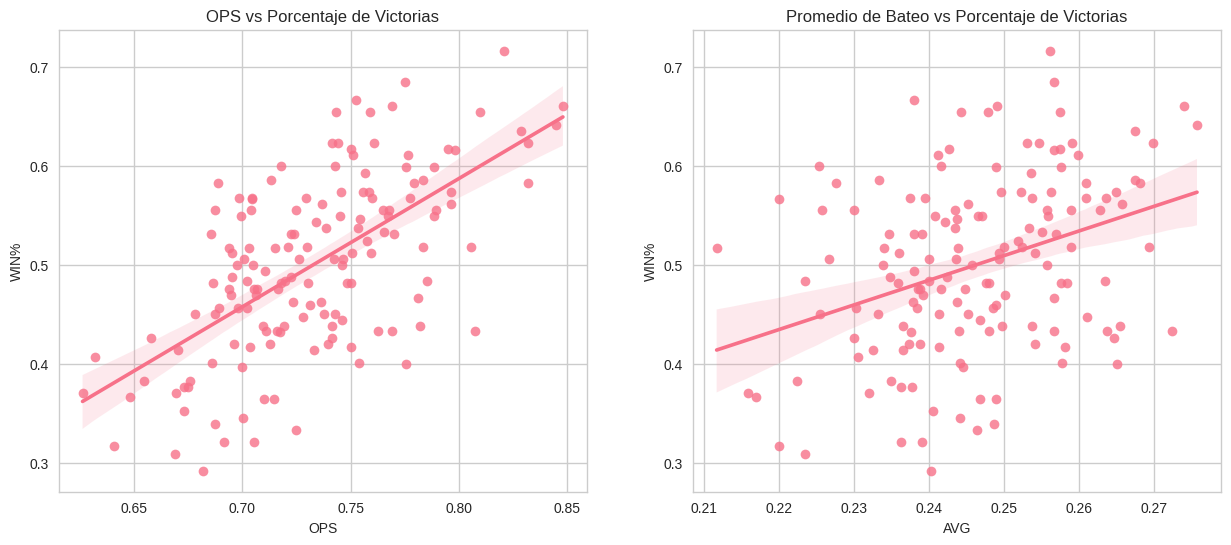

In [5]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# OPS vs WIN%
sns.regplot(data=df, x='OPS', y='WIN%', ax=ax1)
ax1.set_title('OPS vs Porcentaje de Victorias')

# AVG vs WIN%
sns.regplot(data=df, x='AVG', y='WIN%', ax=ax2)
ax2.set_title('Promedio de Bateo vs Porcentaje de Victorias')

# Calcular correlaciones
ops_corr = stats.pearsonr(df['OPS'], df['WIN%'])
avg_corr = stats.pearsonr(df['AVG'], df['WIN%'])

print("\nCorrelación OPS vs WIN%:", ops_corr[0].round(3))
print("Correlación AVG vs WIN%:", avg_corr[0].round(3))


## 3. Análisis de WHIP y Playoffs


T-test para WHIP entre equipos de playoffs y no playoffs:
T-statistic: -8.969
P-value: 0.000


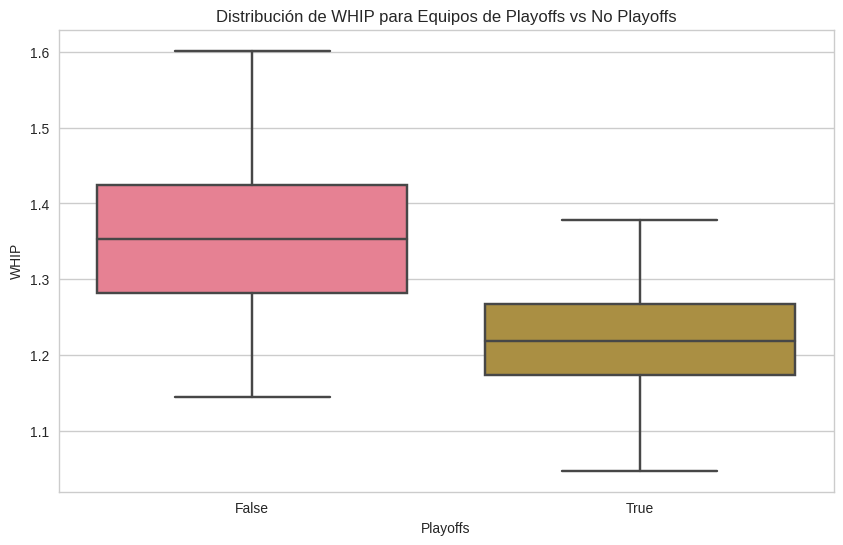

In [6]:

# Asumimos que equipos con WIN% > 0.550 generalmente llegan a playoffs
df['Playoffs'] = df['WIN%'] > 0.550

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Playoffs', y='WHIP')
plt.title('Distribución de WHIP para Equipos de Playoffs vs No Playoffs')

# T-test para WHIP entre equipos de playoffs y no playoffs
playoffs_whip = df[df['Playoffs']]['WHIP']
no_playoffs_whip = df[~df['Playoffs']]['WHIP']
ttest_result = stats.ttest_ind(playoffs_whip, no_playoffs_whip)

print("\nT-test para WHIP entre equipos de playoffs y no playoffs:")
print(f"T-statistic: {ttest_result[0]:.3f}")
print(f"P-value: {ttest_result[1]:.3f}")


## 4. Matriz de Correlación para Métricas Principales

Text(0.5, 1.0, 'Matriz de Correlación de Métricas Principales')

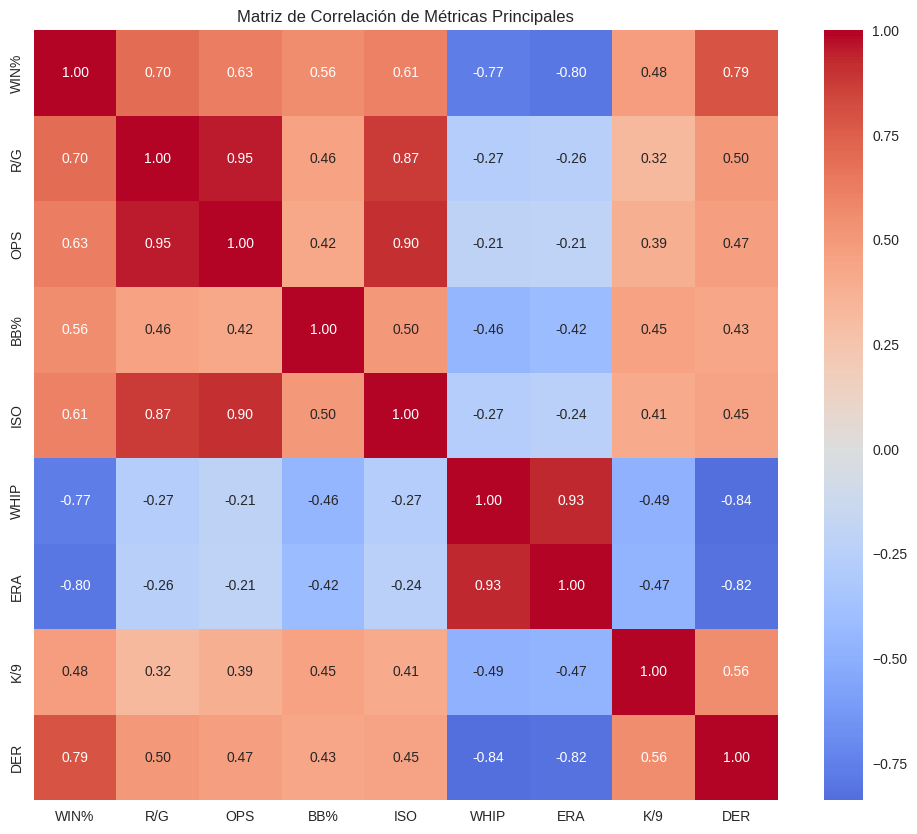

In [7]:

metrics = ['WIN%', 'R/G', 'OPS', 'BB%', 'ISO', 'WHIP', 'ERA', 'K/9', 'DER']
correlation_matrix = df[metrics].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación de Métricas Principales')

## 5. Tendencias a lo largo del tiempo

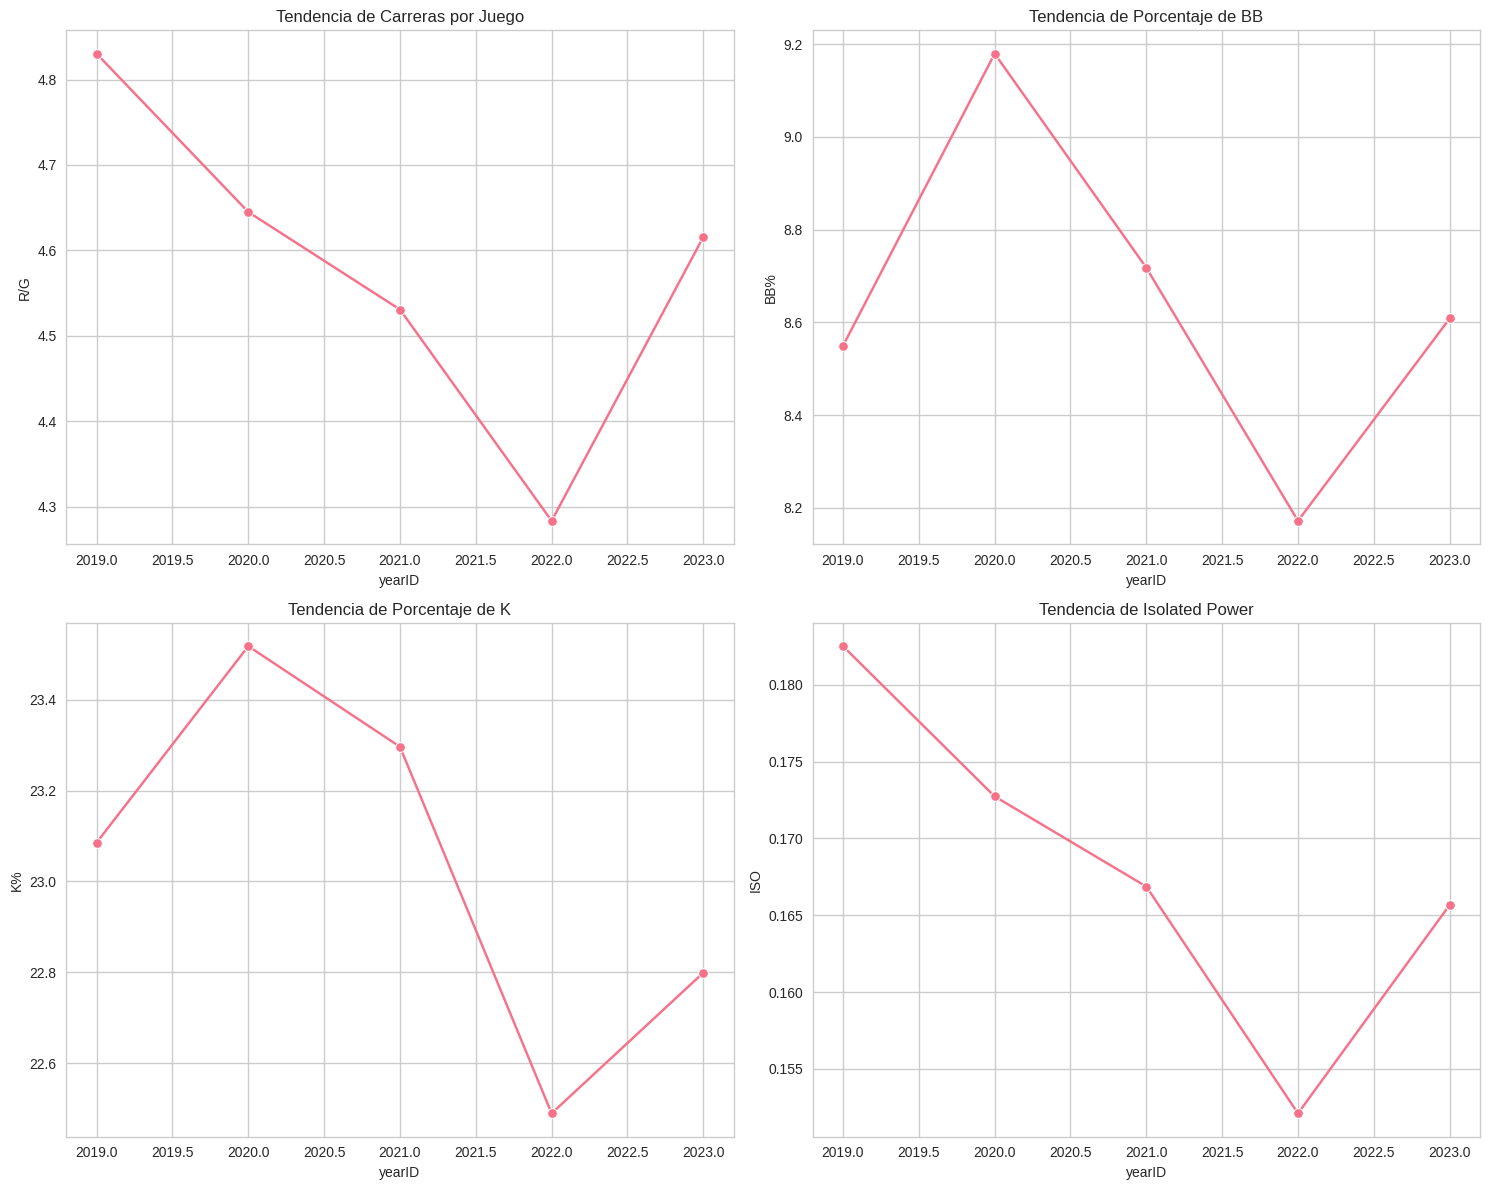

In [8]:

yearly_stats = df.groupby('yearID').agg({
    'R/G': 'mean',
    'BB%': 'mean',
    'K%': 'mean',
    'ISO': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
metrics = ['R/G', 'BB%', 'K%', 'ISO']
titles = ['Carreras por Juego', 'Porcentaje de BB', 'Porcentaje de K', 'Isolated Power']

for ax, metric, title in zip(axes.ravel(), metrics, titles):
    sns.lineplot(data=yearly_stats, x='yearID', y=metric, ax=ax, marker='o')
    ax.set_title(f'Tendencia de {title}')

plt.tight_layout()

# Guardar las figuras
plt.savefig('../presentation/analysis_figures.png')
